<a href="https://colab.research.google.com/github/heddgehogg/KSVD/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_8_%D0%A9%D0%B5%D1%80%D0%B1%D0%B8%D0%BD%D0%B0_%D0%BF%D1%80%D0%B8%D1%81%D1%83%D1%82%D0%BD%D1%8F_%D0%BD%D0%B0_%D0%BF%D0%B0%D1%80%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Завдання 1. Відкрити файл

In [3]:
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [5]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', encoding='latin1')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Завдання 2. Перевіримо чи є пропуски у датасеті.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Завдання 3. Пояснимо назви колонок

In [8]:
columns_explanation = pd.DataFrame({
    "Назва колонки": [
        "Person ID", "Gender", "Age", "Occupation", "Sleep Duration",
        "Quality of Sleep", "Physical Activity Level", "Stress Level",
        "BMI Category", "Blood Pressure", "Heart Rate", "Daily Steps", "Sleep Disorder"
    ],
    "Пояснення": [
        "Унікальний ідентифікатор особи",
        "Стать",
        "Вік особи",
        "Рід занять або професія",
        "Тривалість сну за ніч (у годинах)",
        "Якість сну (оцінка від 1 до 10)",
        "Рівень фізичної активності (хвилини, присвячені фізичній активності)",
        "Рівень стресу (бали від 1 до 10)",
        "Категорія ІМТ (наприклад, Normal, Overweight, Obese)",
        "Кров'яний тиск (наприклад, 120/80)",
        "Серцебиття (ударів за хвилину)",
        "Кількість кроків за день",
        "Наявність порушення сну (наприклад, Insomnia, Apnea, None)"
    ]
})

columns_explanation

,Назва колонки,Пояснення
0,Person ID,Унікальний ідентифікатор особи
1,Gender,Стать
2,Age,Вік особи
3,Occupation,Рід занять або професія
4,Sleep Duration,Тривалість сну за ніч (у годинах)
5,Quality of Sleep,Якість сну (оцінка від 1 до 10)
6,Physical Activity Level,"Рівень фізичної активності (хвилини, присвячен..."
7,Stress Level,Рівень стресу (бали від 1 до 10)
8,BMI Category,"Категорія ІМТ (наприклад, Normal, Overweight, ..."
9,Blood Pressure,"Кров'яний тиск (наприклад, 120/80)"


Завдання 4. Перевіримо розміри датасету

In [9]:
df.shape

(374, 13)

Завдання 5. Перевіримо кількість дублікатів

In [10]:
df.duplicated().sum()

np.int64(0)

Завдання 6. Переведемо типи даних в числові (категоріальні ознаки)

In [11]:
# Колонка gender
df['Gender_Code'] = df['Gender'].map({'Female': 0, 'Male': 1})

cols = list(df.columns)
occ_index = cols.index('Gender')
cols.remove('Gender_Code')
cols.insert(occ_index + 1, 'Gender_Code')
df = df[cols]

In [12]:
# Колонка occupation
df.loc[:, 'Occupation_Code'] = df['Occupation'].map({
    'Nurse': 0,
    'Doctor': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Teacher': 4,
    'Accountant': 5,
    'Salesperson': 6,
    'Scientist': 7,
    'Software Engineer': 8,
    'Sales Representative': 9,
    'Manager': 10
})

cols = list(df.columns)
occ_index = cols.index('Occupation')
cols.remove('Occupation_Code')
cols.insert(occ_index + 1, 'Occupation_Code')
df = df[cols]

<ipython-input-12-2529818e41ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Occupation_Code'] = df['Occupation'].map({


In [13]:
# Колонка bmi category
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Underweight')

df['BMI Category_Code'] = df['BMI Category'].map({
    'Normal': 0,
    'Overweight': 1,
    'Obese': 2,
    'Underweight': 3
})

cols = list(df.columns)
occ_index = cols.index('BMI Category')
cols.remove('BMI Category_Code')
cols.insert(occ_index + 1, 'BMI Category_Code')
df = df[cols]

In [14]:
# Колонка sleep disorder
most_common = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(most_common)

df['Sleep Disorder_Code'] = df['Sleep Disorder'].map({'Sleep Apnea': 0, 'Insomnia': 1})

cols = list(df.columns)
occ_index = cols.index('Sleep Disorder')
cols.remove('Sleep Disorder_Code')
cols.insert(occ_index + 1, 'Sleep Disorder_Code')
df = df[cols]

In [15]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

df.drop(columns=['Blood Pressure'], inplace=True)

In [16]:
df

,Person ID,Gender,Gender_Code,Age,Occupation,Occupation_Code,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,BMI Category_Code,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder_Code,Systolic_BP,Diastolic_BP
0,1,Male,1,27,Software Engineer,8,6.1,6,42,6,Overweight,1,77,4200,Sleep Apnea,0,126,83
1,2,Male,1,28,Doctor,1,6.2,6,60,8,Normal,0,75,10000,Sleep Apnea,0,125,80
2,3,Male,1,28,Doctor,1,6.2,6,60,8,Normal,0,75,10000,Sleep Apnea,0,125,80
3,4,Male,1,28,Sales Representative,9,5.9,4,30,8,Obese,2,85,3000,Sleep Apnea,0,140,90
4,5,Male,1,28,Sales Representative,9,5.9,4,30,8,Obese,2,85,3000,Sleep Apnea,0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,0,59,Nurse,0,8.1,9,75,3,Overweight,1,68,7000,Sleep Apnea,0,140,95
370,371,Female,0,59,Nurse,0,8.0,9,75,3,Overweight,1,68,7000,Sleep Apnea,0,140,95
371,372,Female,0,59,Nurse,0,8.1,9,75,3,Overweight,1,68,7000,Sleep Apnea,0,140,95
372,373,Female,0,59,Nurse,0,8.1,9,75,3,Overweight,1,68,7000,Sleep Apnea,0,140,95


Завдання 7. Ще раз перевіримо наявність пропущених даних

In [17]:
print(df.isna().sum())

Person ID                  0
Gender                     0
Gender_Code                0
Age                        0
Occupation                 0
Occupation_Code            0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
BMI Category_Code          0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Sleep Disorder_Code        0
Systolic_BP                0
Diastolic_BP               0
dtype: int64


Завдання 8. Перевіримо основну інформацію по датасету

In [18]:
df.describe()

,Person ID,Gender_Code,Age,Occupation_Code,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category_Code,Heart Rate,Daily Steps,Sleep Disorder_Code,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,2.574866,7.132086,7.312834,59.171123,5.385027,0.617647,70.165775,6816.844920,0.205882,128.553476,84.649733
std,108.108742,0.500641,8.673133,2.133232,0.795657,1.196956,20.830804,1.774526,0.792599,4.135676,1617.915679,0.404887,7.748118,6.161611
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,2.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,4.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,0.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000,142.000000,95.000000


Завдання 9. Побудуємо матрицю кореляції

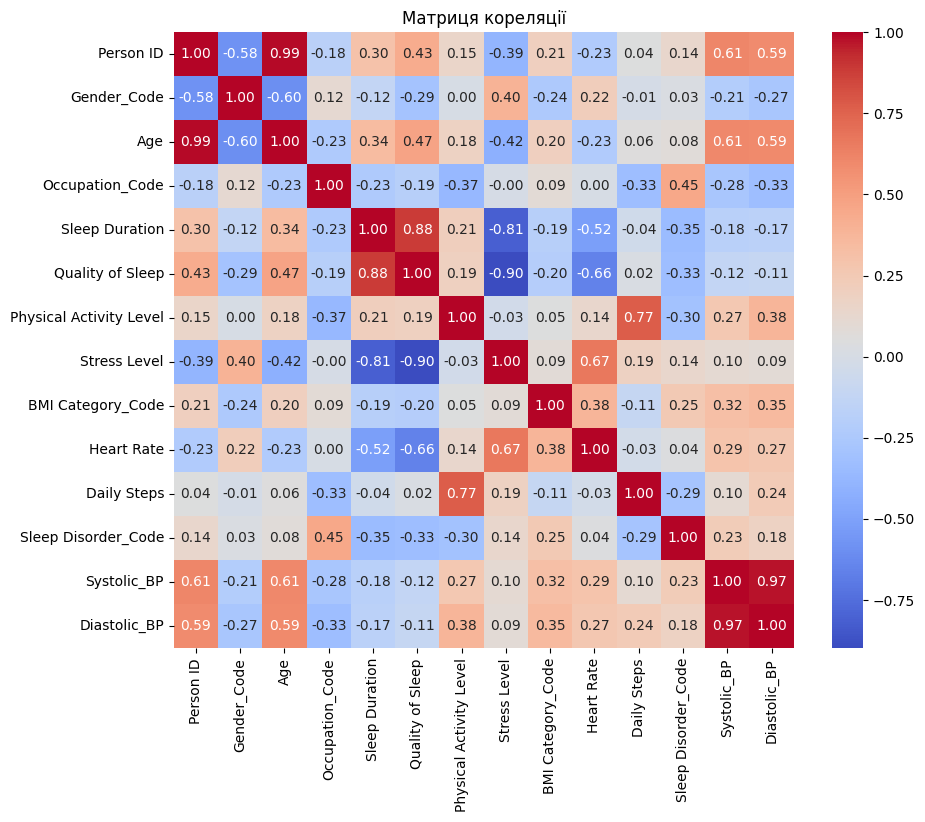

In [19]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матриця кореляції')
plt.show()


Завдання 10. 3 Графіки matplotlib

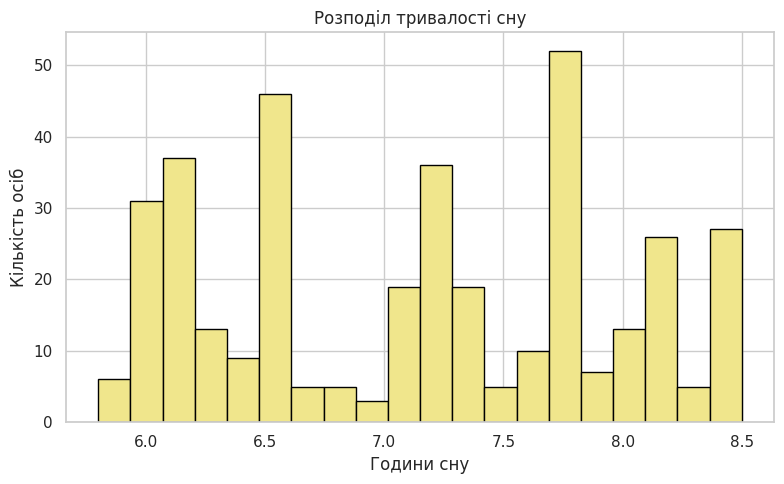

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(df['Sleep Duration'], bins=20, color='khaki', edgecolor='black')
plt.title('Розподіл тривалості сну')
plt.xlabel('Години сну')
plt.ylabel('Кількість осіб')
plt.grid(True)
plt.tight_layout()
plt.show()

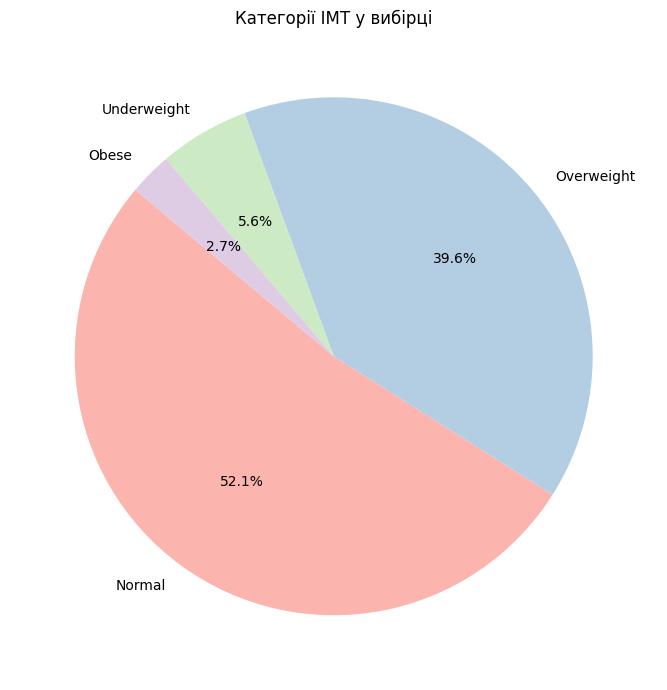

In [26]:
bmi_counts = df['BMI Category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Категорії ІМТ у вибірці')
plt.tight_layout()
plt.show()

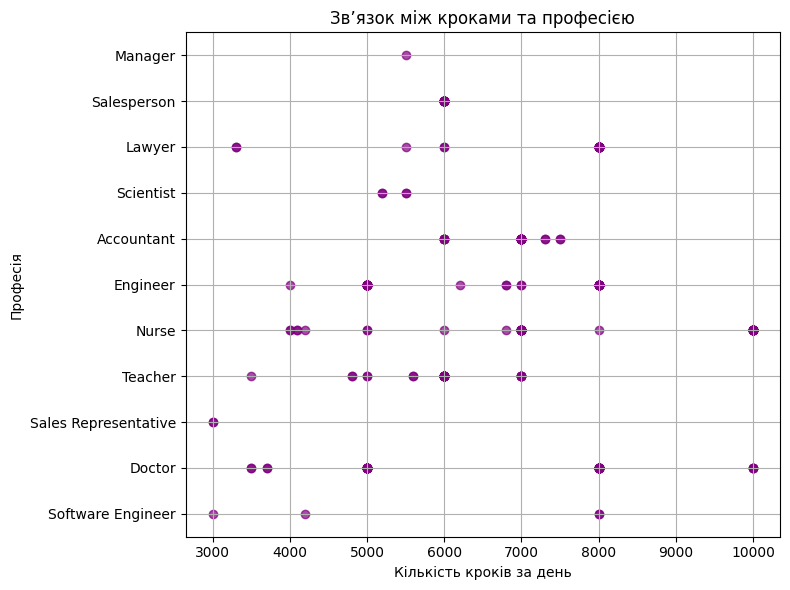

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Daily Steps'], df['Occupation'], alpha=0.7, color='purple')
plt.title('Зв’язок між кроками та професією')
plt.xlabel('Кількість кроків за день')
plt.ylabel('Професія')
plt.grid(True)
plt.tight_layout()
plt.show()

Завдання 11. 3 Графіки seaborn

<ipython-input-28-3badd4e33dda>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Occupation", y="Stress Level", ci=None, palette="magma")
<ipython-input-28-3badd4e33dda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Occupation", y="Stress Level", ci=None, palette="magma")


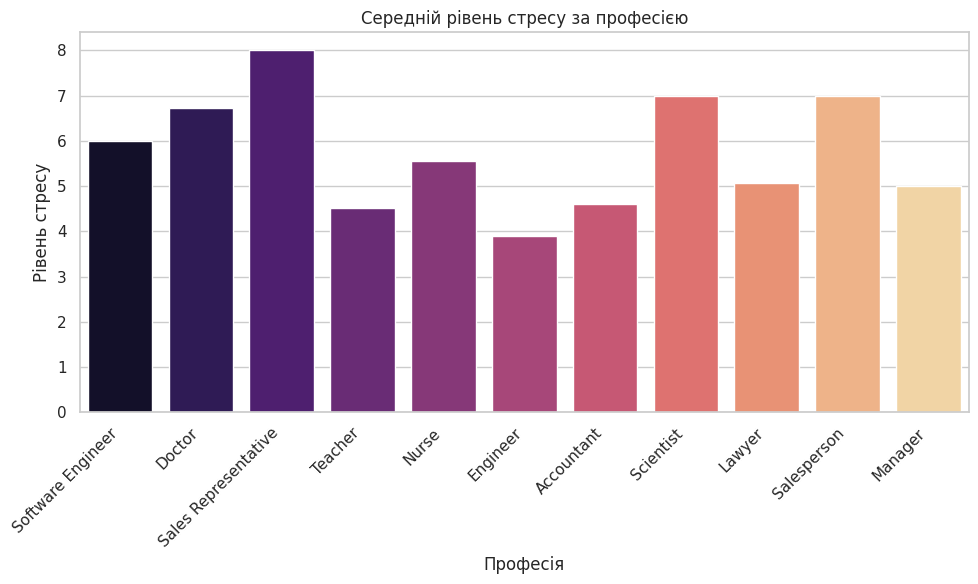

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Occupation", y="Stress Level", ci=None, palette="magma")
plt.title("Середній рівень стресу за професією")
plt.xlabel("Професія")
plt.ylabel("Рівень стресу")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


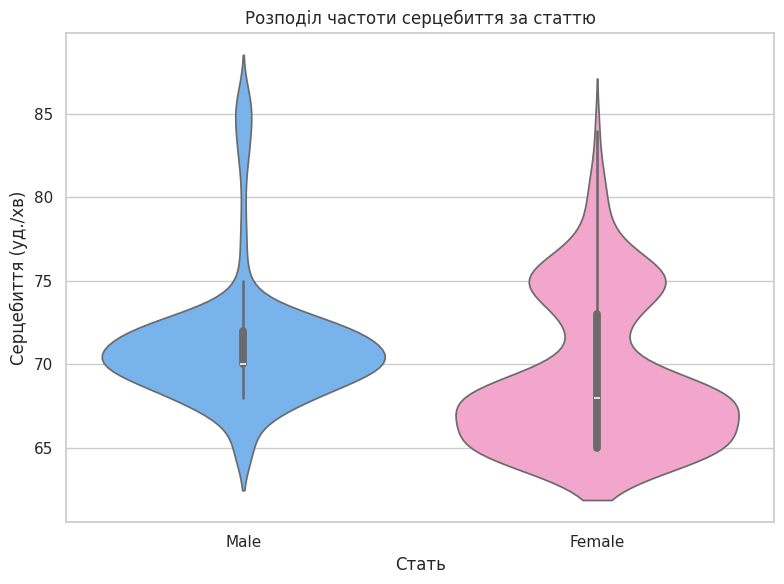

In [46]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x="Gender",
    y="Heart Rate",
    hue="Gender",
    palette={"Male": "#66b3ff", "Female": "#ff99cc"},
    legend=False)
plt.title("Розподіл частоти серцебиття за статтю")
plt.xlabel("Стать")
plt.ylabel("Серцебиття (уд./хв)")
plt.tight_layout()
plt.show()

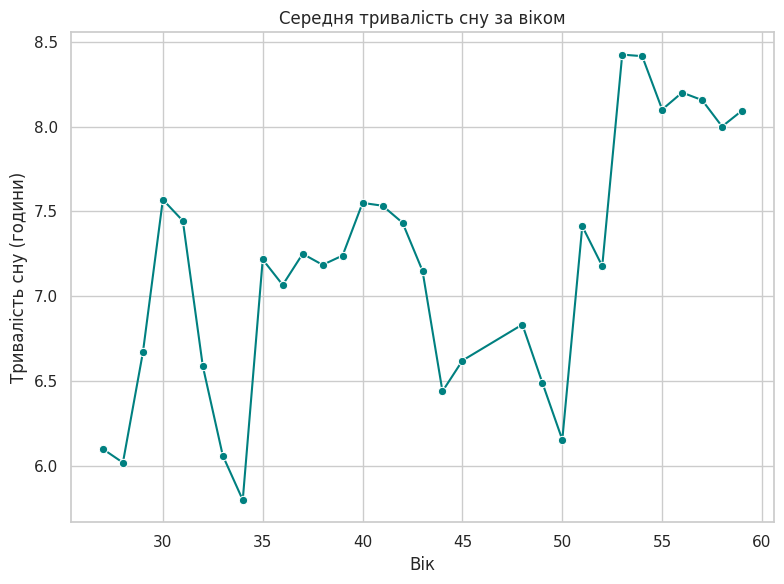

In [36]:
plt.figure(figsize=(8, 6))
avg_sleep_by_age = df.groupby('Age')['Sleep Duration'].mean().reset_index()
sns.lineplot(data=avg_sleep_by_age, x='Age', y='Sleep Duration', marker='o', color='teal')
plt.title("Середня тривалість сну за віком")
plt.xlabel("Вік")
plt.ylabel("Тривалість сну (години)")
plt.tight_layout()
plt.show()

Завдання 12. 3 Графіки plotly

In [38]:
fig1 = px.scatter(
    df, x='Stress Level', y='Sleep Duration',
    color='Gender', size='Heart Rate',
    title='Stress vs Sleep Duration',
    color_discrete_sequence=px.colors.sequential.Agsunset)
fig1.show()

In [51]:
fig2 = px.histogram(
    df, x='Daily Steps', color='Gender',
    nbins=20, title='Distribution of Daily Steps',
    color_discrete_map={
        'Male': '#66b3ff',
        'Female': '#ff99cc'})
fig2.show()

In [53]:
fig3 = px.sunburst(
    df, path=['Occupation', 'Gender'], values='Heart Rate',
    title='Occupation and Gender by Heart Rate',
    color_continuous_scale='greens')
fig3.show()